<a href="https://colab.research.google.com/github/ruoroj/AutolibHypothesis/blob/main/Independent_Project_Week_4_Moringa_School_John_Ruoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Overview
We have been hired by a Paris based car sharing service. The car sharing service has three services that is:
Blue cars

*   Blue cars
*   Utilib cars
*   Utilib 14



The data recorded is to indicate the number of cars taken and the number of cars returned each day 




Null hypothesis: There are more Blue cars that are taken on weekends than Utilib cars.


Alternate Hypothesis: There are less Blue cars taken on the weekends than Utilib cars


# Objective
The main objective is to find out how to optimize their car sharing service. The car sharing service might experience hiccups because of a shortage of cars in an area that has a lot of clients in need of the service or too many cars in an area without clients. 

Therefore the main objective is:
 

1.   To find out how to optimize the car sharing service in the Area. 





## Define Sucess Metrics
The project will be considered successful if the following activities and criteria can be met. 

The data is successfully loaded and cleaned.

1.   The data is successfully loaded and cleaned.
2.   Perform univariate and bivariate data on the data.
3.   Define the research question and Hypothesis.
4.   Perform Hypothesis testing.




## Importing Libraries

In [1]:
# Importing the Numpy, matplotlib, pandas, stats
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from statistics import stdev

from scipy import stats

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Dataset

In [2]:
# The dataset URL and explanation url
dataset = 'http://bit.ly/DSCoreAutolibDataset'
glosary = 'http://bit.ly/DSCoreAutolibDatasetGlossary'

In [3]:
# Let's read the data from the CSV file and create the dataframe to be used
# 
autolib = pd.read_csv(dataset) 
glossary_df = pd.read_excel(glosary)

## Preview Dataset

In [4]:
#previewing the first 10 rows
autolib.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [5]:
# previewing the last 10 rows
autolib.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
# Preview the glossary_df
glossary_df

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## Accessing Information about our Dataset

In [7]:
# Checking for the Shape of the dataframe
autolib.shape

(16085, 13)

In [8]:
# Checking for the dtypes and the information in the database
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [9]:
# Check for the number of unique variablesin each field
autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

##  Cleaning our Dataset

The dataset might require a little attention in terms of cleaning before the analysis of the data can begin. 

In [10]:
#some of the steps to follow during the cleaning process are as follows:

  # Validity
  #   relevant 
  #   Syntax Errors
  # Completeness
  #   Checking/ Counting Missing Values 
  #   2: Dropping Missing Values 
  #   Imputing
  # Consistency -Duplicates
  # Uniformity - Standardization (Renaming column names)

###  Uniformity

In [11]:
# Standardization
# Rename all the column names
autolib.columns = ['postal_code', 'date', 'n_daily_data_points', 'day_Of_Week', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'day_Of_Week', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

###  Validity

In [12]:
#check the relevance of all columns
autolib.columns 
# The two columns that are not useful in the analysis that will proceed are the 'n_daily_data_points' &	'dayOfWeek'
# Therefore, the next step will be to drop the two columns 
autolib.drop(['n_daily_data_points',	'day_Of_Week'], axis = 1, inplace = True) 
print ('Columns successfully dropped')
# Check if the columns have been successfully dropped. 


Columns successfully dropped


In [13]:
# Converting the date column to the appropriate data type 
autolib['date'] =  pd.to_datetime(autolib['date'])

# check info
print ('Conversion Complete')

Conversion Complete


###  Completeness

In [14]:
#check for missing values 
autolib.isna().sum()

postal_code               0
date                      0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing data in the dataset. 

### Consistency

In [15]:
# check for duplicates
autolib.duplicated().sum()

0

There are no duplicated records in the Dataframe. 

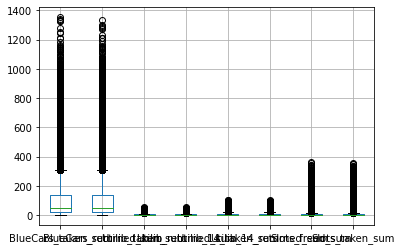

In [16]:
# checking for outliers
num_cols = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum','Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']
boxplot = autolib.boxplot(num_cols)


There are numerous outliers in the autolib data. 

In [17]:
# Removing Outliers. 


Q1 = autolib[num_cols].quantile(0.25)
Q3 = autolib[num_cols].quantile(0.75)
IQR = Q3 - Q1

autolib = autolib[~((autolib[num_cols] < (Q1 - 1.5 * IQR)) |(autolib[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

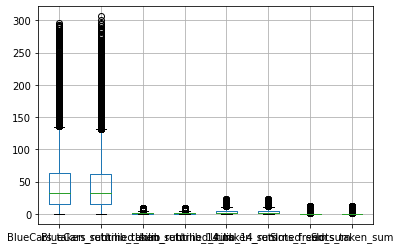

In [18]:
# Confirming all the outliers are removed 
boxplot = autolib.boxplot(num_cols)

In [19]:
autolib.shape

(12563, 11)

##  Analysing the data



### Univariate analysis

#### Blue cars

In [20]:
# mean 
meanb = autolib['BlueCars_taken_sum'].sum()/autolib['BlueCars_taken_sum'].count()
print ("The Mean of blue cars taken is: ", meanb)

The Mean of blue cars taken is:  46.97102602881478


In [21]:
# mode
modeb = autolib['BlueCars_taken_sum'].mode()
print('The mode of Blue cars taken is: ', modeb)

The mode of Blue cars taken is:  0    12
dtype: int64


In [22]:
# median
medianb = autolib['BlueCars_taken_sum'].median()
print('The median of Blue cars taken is: ', medianb)

The median of Blue cars taken is:  32.0


In [23]:
# Variance
autolib['BlueCars_taken_sum'].var()

2034.0176288387993

In [24]:
# Kurtosis
autolib['BlueCars_taken_sum'].kurt()

4.416266494681915

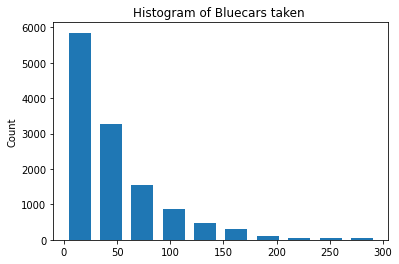

In [25]:
# Histogram of Bluecars
hist = plt.hist(autolib['BlueCars_taken_sum'], rwidth=0.7)
plt.ylabel('Count')
plt.title('Histogram of Bluecars taken ')

plt.show()

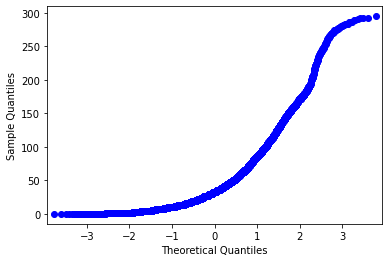

In [26]:
# Q-Q plots of the Blue cars taken
sm.qqplot(autolib['BlueCars_taken_sum'])
plt.show()

#### Utilib cars

In [27]:
# mean 
mean_ut = autolib['Utilib_taken_sum'].sum()/autolib['Utilib_taken_sum'].count()
print ("The Mean of Utilib taken is: ", mean_ut)


The Mean of Utilib taken is:  1.4333359866273978


In [28]:
# mode
modeu = autolib['Utilib_taken_sum'].mode()
print('The mode of Utilib cars taken is: ', modeu)

The mode of Utilib cars taken is:  0    0
dtype: int64


In [29]:
# median
medianu = autolib['Utilib_taken_sum'].median()
print('The median of Utilib cars taken is: ', medianu)


The median of Utilib cars taken is:  1.0


In [30]:
# Variance
autolib['Utilib_taken_sum'].var()

3.4843909320814626

In [31]:
# Kurtosis
autolib['Utilib_taken_sum'].kurt()

2.9023356053248945

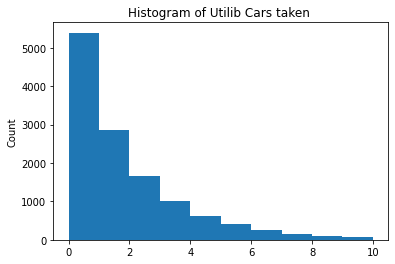

In [32]:
# Histogram of Bluecars
hist = plt.hist(autolib['Utilib_taken_sum'], )
plt.ylabel('Count')
plt.title('Histogram of Utilib Cars taken ')

plt.show()

#### Utilib 14

In [33]:
# mean 
mean_ut14 = autolib['Utilib_14_taken_sum'].sum()/autolib['Utilib_14_taken_sum'].count()
print ("The Mean of Utilib 14 taken is: ", mean_ut14)


The Mean of Utilib 14 taken is:  3.3897954310276206


In [34]:
# mode
modeu4 = autolib['Utilib_14_taken_sum'].mode()
print('The mode of Utilib 14 cars taken is: ', modeu4)

The mode of Utilib 14 cars taken is:  0    0
dtype: int64


In [35]:
# median
medianu4 = autolib['Utilib_14_taken_sum'].median()
print('The median of Utilib 14 cars taken is: ', medianu4)


The median of Utilib 14 cars taken is:  2.0


In [36]:
# Variance
autolib['Utilib_14_taken_sum'].var()

14.267168585754696

In [37]:
# Kurtosis
autolib['Utilib_14_taken_sum'].kurt()

3.204670352691785

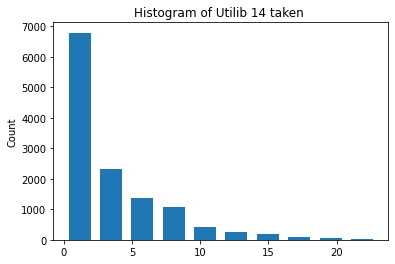

In [38]:
# Histogram of Bluecars
hist = plt.hist(autolib['Utilib_14_taken_sum'], rwidth=0.7)
plt.ylabel('Count')
plt.title('Histogram of Utilib 14 taken ')

plt.show()

### Bivariate Analysis

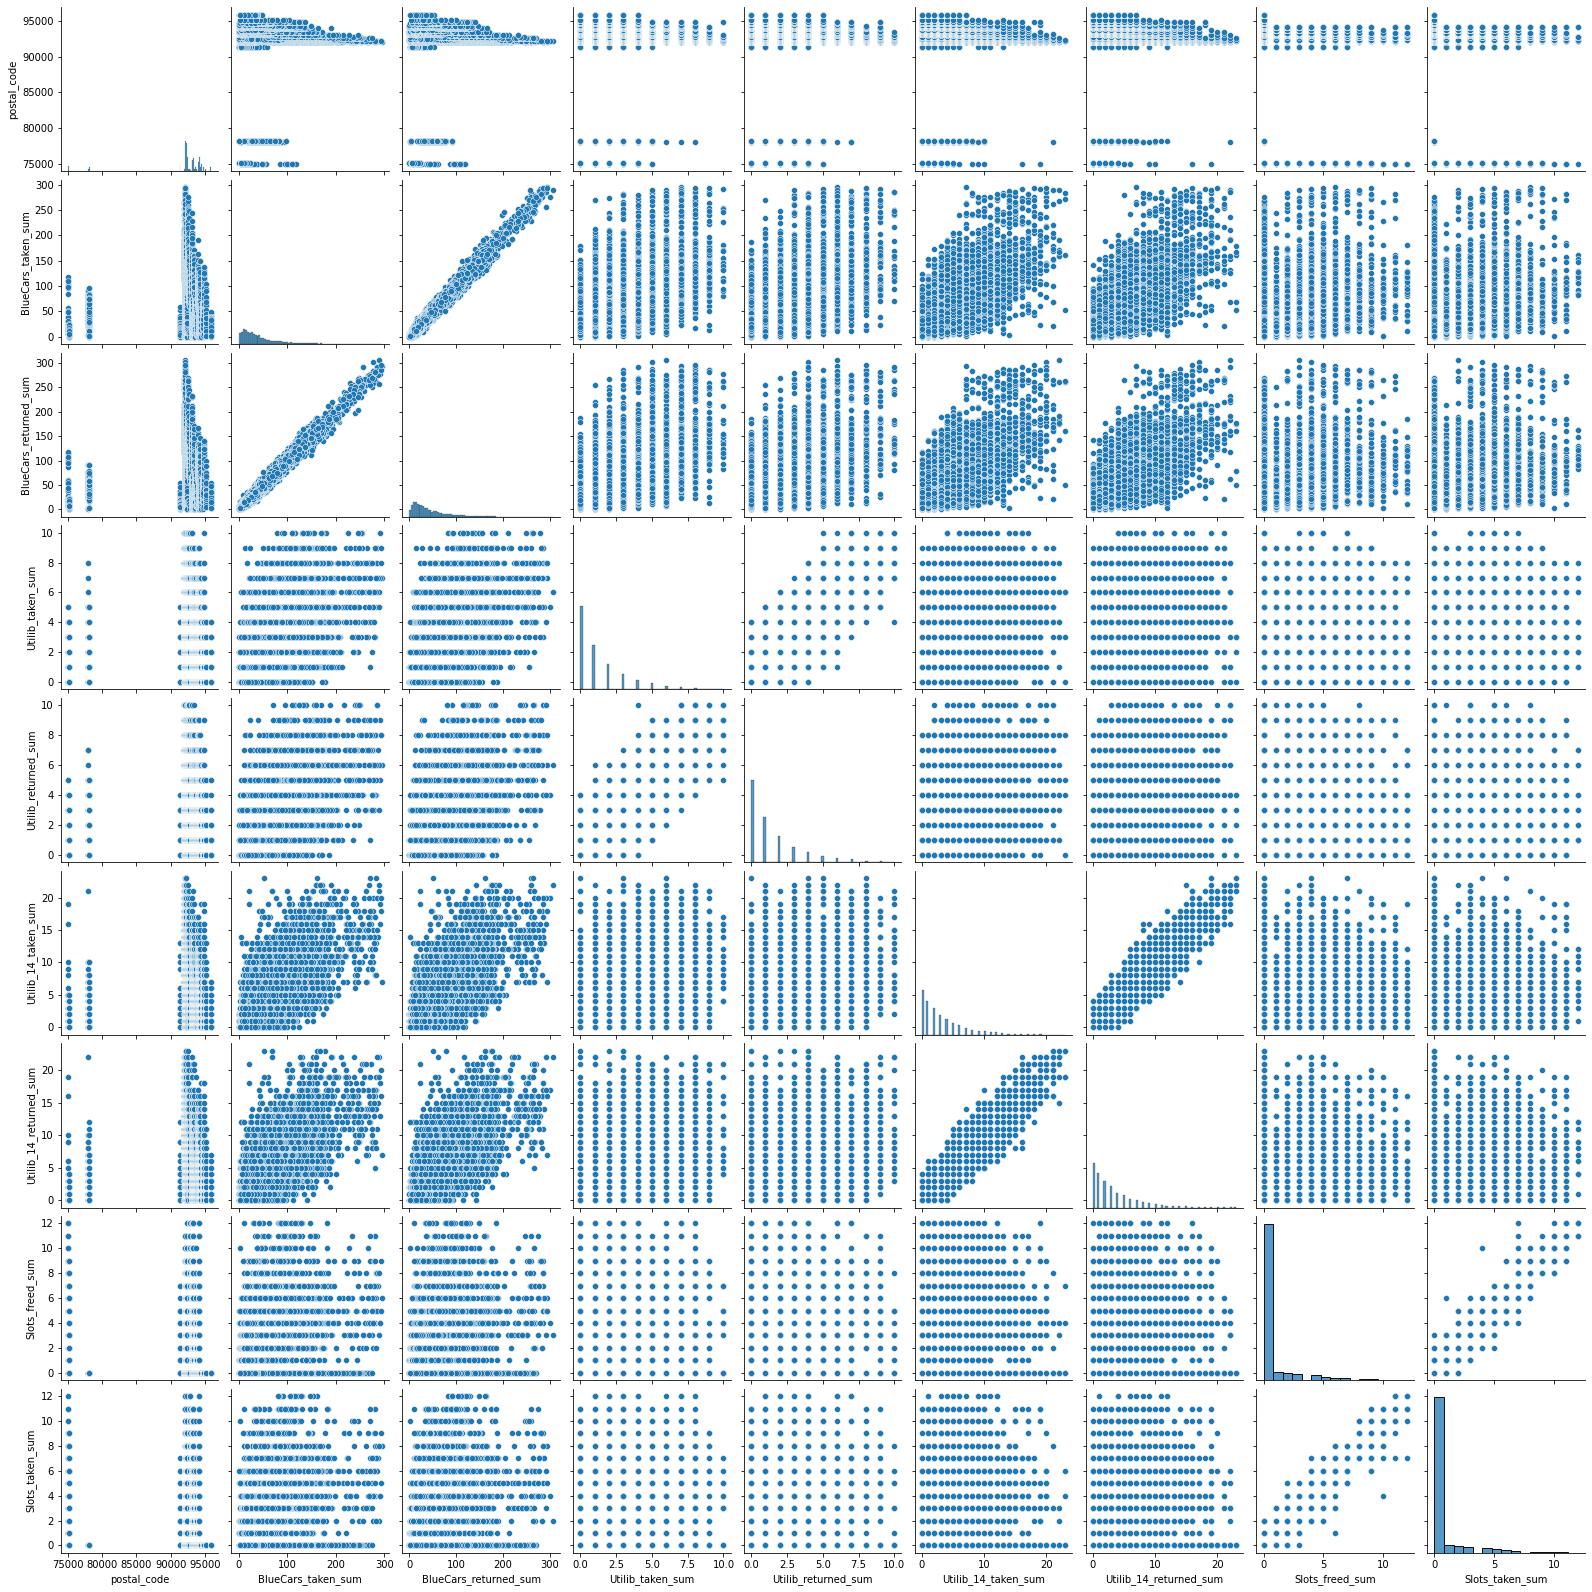

In [39]:
# numerical Numerical analysis
import seaborn as sns
sns.pairplot(autolib)


From the Pair plot of numerical values, The two columns that have a corelation aremthe Bluecars_taken_sum and the Bluecars_returned_sum. 

Text(0.5, 1.0, 'Scatterplot of Blue cars taken and returned on Weekends and weekdays')

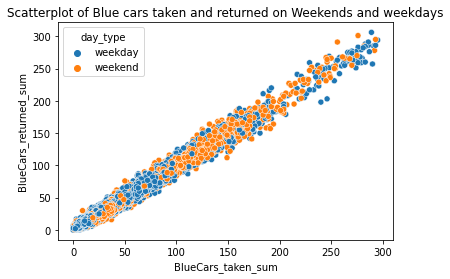

In [40]:
sns.scatterplot(x = 'BlueCars_taken_sum', y = 'BlueCars_returned_sum', data = autolib,  hue = 'day_type' )
plt.title('Scatterplot of Blue cars taken and returned on Weekends and weekdays', )

There is a strong correlation between the sum of the blue cars taken and those returned. 

Text(0.5, 1.0, 'Scatterplot of Utilib taken and returned on Weekends and weekdays')

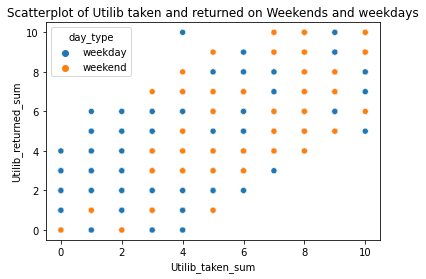

In [41]:
sns.scatterplot(x = 'Utilib_taken_sum', y = 'Utilib_returned_sum', data = autolib,  hue = 'day_type' )
plt.title('Scatterplot of Utilib taken and returned on Weekends and weekdays')


There seems to be no visible corelatiion between the number of Utilib cars taken and those that are returned.  

Text(0.5, 0, 'Bluecars sum')

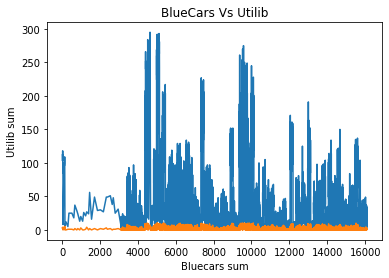

In [42]:

plt.plot(autolib[['BlueCars_taken_sum', 'Utilib_taken_sum']])
plt.title('BlueCars Vs Utilib')
plt.ylabel('Utilib sum')
plt.xlabel('Bluecars sum')


In [43]:
autolib.columns

Index(['postal_code', 'date', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum',
       'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

In [44]:
postal_group =autolib.groupby(['postal_code'])['BlueCars_taken_sum',
        'Utilib_taken_sum', 
       'Utilib_14_taken_sum', 'Slots_freed_sum',
       'Slots_taken_sum'].agg('sum')

postal_group.sort_values('BlueCars_taken_sum', ascending= False).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BlueCars_taken_sum,Utilib_taken_sum,Utilib_14_taken_sum,Slots_freed_sum,Slots_taken_sum
postal_code,,,,,
92150,23064,609,1469,678,675
92000,21987,625,1576,0,0
92600,20999,616,1382,0,0
92130,20352,494,1197,411,410
92500,20330,637,1450,0,0


The above listing shows the number of cars taken from each postal code. The postal code with the Highest mumber of blue cars is 92150 followed by 92000.


In [45]:
# The postal code with the largest number of Blue cars rented
blue_Postal = postal_group['BlueCars_taken_sum'].idxmax()
total_sum = postal_group['BlueCars_taken_sum'].max()
print('The Postal code with the highest number of Blue cars taken is: \n Postal code', blue_Postal, '\n Total number: ', total_sum)

The Postal code with the highest number of Blue cars taken is: 
 Postal code 92150 
 Total number:  23064


In [46]:
# The postal code with the largest number of Utilib rented
utilib_Postal = postal_group['Utilib_taken_sum'].idxmax()
total_sum = postal_group['Utilib_taken_sum'].max()
print('The Postal code with the highest number of Utilib taken is: \n Postal code', utilib_Postal, '\n Total number: ', total_sum)

The Postal code with the highest number of Utilib taken is: 
 Postal code 92500 
 Total number:  637


In [47]:
# The postal code with the largest number of Utilib 14 cars rented
util14_Postal = postal_group['Utilib_14_taken_sum'].idxmax()
total_sum = postal_group['Utilib_14_taken_sum'].max()
print('The Postal code with the highest number of Utilib 14 taken is: \n Postal code:', util14_Postal, '\n Total number: ', total_sum)

The Postal code with the highest number of Utilib 14 taken is: 
 Postal code: 92000 
 Total number:  1576


## Hypothesis Testing

**Null hypothesis**: There is no significant difference between the number of Blue cars taken on the weekdays and the weekends in the 92150 area. 

**Alternate Hypothesis**: There is a significant difference in the number of Blue cars taken on the Weekdays and the Weekends in the 92150 


> Ho : Bluecars_weekday = Bluecars_weekend


> HA : Bluecars_weekday ≠ Bluecars_weekend 


(Bluecars_weekday & Bluecars_weekend represent the mean of the two groups.)

---




Therefore, the first thing to do would be to select only the data that shows the 92150 postal code. 

In [48]:
#filtering for the 92150 postal code. 
df = autolib[autolib['postal_code'] == 92150]
df.shape

(149, 11)

The number of records with the 92150 postal code are 149. 

In [49]:
# preview data
df.head()

,postal_code,date,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5301,92150,2018-01-01,weekday,104,122,2,2,19,21,0,0
5302,92150,2018-01-02,weekday,118,121,2,4,10,5,2,2
5303,92150,2018-01-03,weekday,171,153,5,7,6,8,3,3
5304,92150,2018-01-04,weekday,146,154,6,3,10,7,1,1
5305,92150,2018-01-05,weekday,164,176,3,6,12,15,4,4


In [50]:
# droping irrelevant data from the sampled dataframe. 
irr_cols = ['Utilib_taken_sum', 'Utilib_returned_sum','Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum','Slots_taken_sum']
df.drop(irr_cols, axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
df.columns

Index(['postal_code', 'date', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum'],
      dtype='object')

### Hypothesis Testing Computation 



#### Means

In [52]:

df_mean = df.groupby(['day_type'])['BlueCars_taken_sum'].agg('mean')
df_mean

day_type
weekday    157.400000
weekend    147.435897
Name: BlueCars_taken_sum, dtype: float64

In [53]:
# Assigning the means to x
X1 = df_mean.loc['weekend']
X2 = df_mean.loc['weekday']

#### Standard Deviation

In [54]:
# getting the standard deviation of the blue cars on weekdays and weekends
df_stdv = df.groupby(['day_type'])['BlueCars_taken_sum'].agg('std')
df_stdv

day_type
weekday    25.789266
weekend    31.395436
Name: BlueCars_taken_sum, dtype: float64

In [55]:
# Assigning the standard deviation to s.
S1 =df_stdv.loc['weekend']
S2 =df_stdv.loc['weekday']


#### Sample Size

In [56]:
# # getting the sample size 
df_conter = df.groupby(['day_type'])['BlueCars_taken_sum'].agg('count')
df_conter

day_type
weekday    110
weekend     39
Name: BlueCars_taken_sum, dtype: int64

In [57]:
# Assigning Sample size to K

K1 = df_conter.loc['weekend']
K2 =df_conter.loc['weekday']

#### Performing TTest

In [58]:
#performing T-Test

weekend = stats.norm.rvs(loc= X1, scale =S1, size = K1, random_state = 5)
weekday = stats.norm.rvs(loc= X2, scale =S2, size = K2, random_state = 5)

In [59]:
stats.ttest_ind(weekend, weekday)

Ttest_indResult(statistic=-2.5188778143368467, pvalue=0.012842918224990613)

The pvalue for the hypothesis is 1.28% which is too low. The significance level is 5%. Therefore, the Pvalue can be interepreted as too low and we have to Reject the the Null Hypothesis. 


This was a two-tailed analysis and therefore, the zone of rejection will be at approximately 2.5%. 

In [60]:
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [61]:
#Plotting a T distribution curve
t_vals= np.linspace(-3, 3, 149)
t_pdf_vals = stats.t.pdf(t_vals, 148)

t_dist_fig = go.Figure()
t_dist_fig.add_trace(go.Scatter(x=t_vals, y=t_pdf_vals, mode='lines', name='t distribution'))

t_dist_fig.update_layout(title = 'T distribution')
t_dist_fig.show()

The distribution is Normal. The null hypothesis was rejected because it had a:

p-value = 1.28% 

Therefore, 

p_val < 2.5%

## Recomendation and Conclusions

The recommendations that can be drawn from the autolib dataset is that there is more use of Blue cars than the Utilib cars. The Blue cars are mostly used on the weekend.

The hypothesis is to show there is no difference in the number of blue cars used in the weekend and the weekdays in the postal code area with the highest number of blue cars. The null hypothesis was rejected which stated that there will not be a difference in the number of Bluecars used in the weekends and the weekdays in the area. 
